### Question 8 -
#### Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding\
Insights to be drawn -\
● Get all the overall ratings for each season and using plots compare the ratings for all the\
seasons, like season 1 ratings, season 2, and so on.\
● Get all the episode names, whose average rating is more than 8 for every season\
● Get all the episode names that aired before May 2019\
● Get the episode name from each season with the highest and lowest rating\
● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import requests
# make a Get request to retrieve the episode data for westworld
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
request_url=requests.get(url)
data=request_url.json()

In [2]:
data

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

##### 1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [3]:
# Extract the episode data
season_episode=data['_embedded']['episodes']
season_episode

[{'id': 869671,
  'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original',
  'name': 'The Original',
  'season': 1,
  'number': 1,
  'type': 'regular',
  'airdate': '2016-10-02',
  'airtime': '21:00',
  'airstamp': '2016-10-03T01:00:00+00:00',
  'runtime': 68,
  'rating': {'average': 8},
  'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg',
   'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'},
  'summary': "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>",
  '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/869671'},
   'show': {'href': 'https://api.tvmaze.com/shows/1371'}}},
 {'id': 911201,
  'url':

In [4]:
#create a list to store season and ratings
seasons=[]
ratings=[]

for episode in season_episode:
    season = episode['season']
    rating = episode['rating']['average']
    seasons.append(season)
    ratings.append(float(rating) if rating is not None else 0.0)

In [5]:
#create a Dataframe
df=pd.DataFrame({'Season':seasons,'Rating':ratings})
df.head(5)

,Season,Rating
0,1,8.0
1,1,7.7
2,1,7.6
3,1,7.9
4,1,8.0


In [6]:
# calculate the mean rating for all season
Season_ratings=df.groupby('Season')['Rating'].mean()
Season_ratings

Season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: Rating, dtype: float64

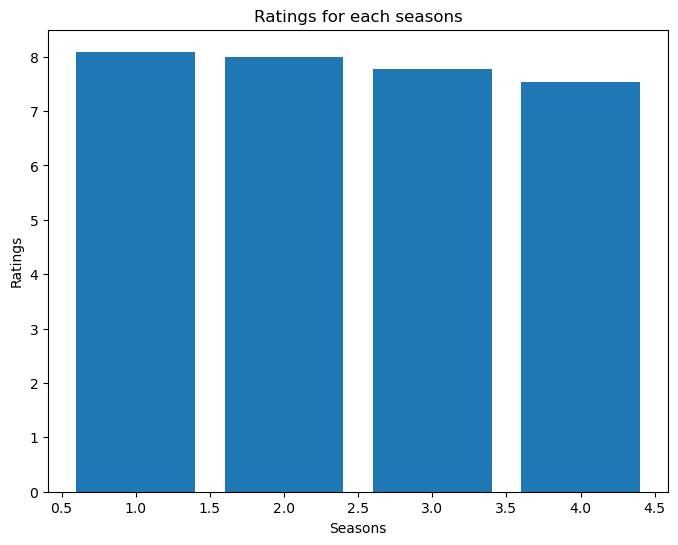

In [7]:
#create bar plot compare the ratings for all the seasons
plt.figure(figsize=(8,6))
plt.bar(Season_ratings.index,Season_ratings.values)
plt.xlabel("Seasons")
plt.ylabel("Ratings")
plt.title("Ratings for each seasons")
plt.show()

 ##### 2 .Get all the episode names, whose average rating is more than 8 for every season

In [8]:
data

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

In [9]:
season_episode

[{'id': 869671,
  'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original',
  'name': 'The Original',
  'season': 1,
  'number': 1,
  'type': 'regular',
  'airdate': '2016-10-02',
  'airtime': '21:00',
  'airstamp': '2016-10-03T01:00:00+00:00',
  'runtime': 68,
  'rating': {'average': 8},
  'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg',
   'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'},
  'summary': "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>",
  '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/869671'},
   'show': {'href': 'https://api.tvmaze.com/shows/1371'}}},
 {'id': 911201,
  'url':

In [10]:
# Create a dictionary to store the ratings and episode names by season
season_ratings = {}
season_episodes = {}

# Iterate over the episodes and extract the season number, episode name, and rating
for episode in season_episode:
    season = episode['season']
    episode_name = episode['name']
    rating = episode['rating']['average']
    
    # Check if the rating is available and greater than 8
    if rating and float(rating) > 8:
        # Add the rating to the respective season's list
        season_ratings.setdefault(season, []).append(float(rating))
        # Add the episode name to the respective season's list
        season_episodes.setdefault(season, []).append(episode_name)



In [11]:
# Get the episode names for each season with an average rating > 8
selected_episodes = []
for season, ratings in season_ratings.items():
    # Check if all episode ratings for the season are greater than 8
    if all(rating > 8 for rating in ratings):
        selected_episodes.extend(season_episodes[season])


In [12]:
for season, ratings in season_ratings.items():
    print(f"The season is : {season}")
    print(f"the ratings is :{ratings}")
    

The season is : 1
the ratings is :[8.6, 8.5, 8.7]
The season is : 2
the ratings is :[8.7, 8.4, 8.5]


In [13]:
# Print the selected episode names
for episode_name in selected_episodes:
    print(episode_name)

Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind
Kiksuya
Vanishing Point
The Passenger


##### 4. Get the episode name from each season with the highest and lowest rating

In [14]:
import requests
import matplotlib.pyplot as plt

# Make a GET request to retrieve the episode data for Westworld
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response = requests.get(url)
data = response.json()

# Extract the episode data
episodes = data['_embedded']['episodes']


In [15]:

# Create dictionaries to store the highest and lowest rated episodes for each season
highest_ratings = {}
lowest_ratings = {}

# Iterate over the episodes and extract the episode name and rating for each season
for episode in episodes:
    episode_name = episode['name']
    season_number = episode['season']
    rating = episode['rating']['average']
    
    # Update the highest rated episode for the season
    if season_number not in highest_ratings or rating > highest_ratings[season_number][1]:
        highest_ratings[season_number] = (episode_name, rating)
    
    # Update the lowest rated episode for the season
    if season_number not in lowest_ratings or rating < lowest_ratings[season_number][1]:
        lowest_ratings[season_number] = (episode_name, rating)


In [16]:
# Extract the episode names and ratings for plotting
seasons = sorted(highest_ratings.keys(), key=int)
highest_episode_names = [highest_ratings[season][0] for season in seasons]
highest_ratings_values = [highest_ratings[season][1] for season in seasons]
lowest_episode_names = [lowest_ratings[season][0] for season in seasons]
lowest_ratings_values = [lowest_ratings[season][1] for season in seasons]




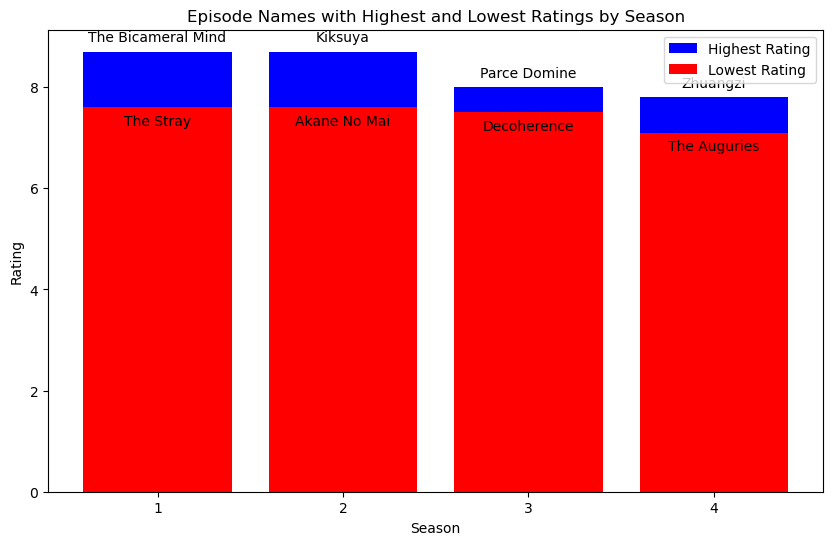

In [17]:
# Plot the episode names with the highest and lowest ratings for each season
plt.figure(figsize=(10, 6))
plt.bar(seasons, highest_ratings_values, color='blue', label='Highest Rating')
plt.bar(seasons, lowest_ratings_values, color='red', label='Lowest Rating')
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Episode Names with Highest and Lowest Ratings by Season')
plt.xticks(seasons)
plt.legend()

# Annotate the episode names on the plot
for i, season in enumerate(seasons):
    plt.annotate(highest_episode_names[i], (season, highest_ratings_values[i]), xytext=(0, 5),
                 textcoords='offset points', ha='center', va='bottom')
    plt.annotate(lowest_episode_names[i], (season, lowest_ratings_values[i]), xytext=(0, -15),
                 textcoords='offset points', ha='center', va='bottom')

plt.show()

##### 5. Get the summary for the most popular ( ratings ) episode in every season


In [18]:
import requests
import matplotlib.pyplot as plt

# Make a GET request to retrieve the episode data for Westworld
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response = requests.get(url)
data = response.json()

# Extract the episode data
episodes = data['_embedded']['episodes']


In [19]:
# Create a dictionary to store the most popular episode summaries for each season
most_popular_episodes = {}

# Iterate over the episodes and extract the summary and rating for each season
for episode in episodes:
    season_number = episode['season']
    rating = episode['rating']['average']
    summary = episode['summary']
    
    # Update the most popular episode for the season
    if season_number not in most_popular_episodes or rating > most_popular_episodes[season_number][1]:
        most_popular_episodes[season_number] = (summary, rating)

In [20]:
# Extract the season numbers, summaries, and ratings for plotting
seasons = sorted(most_popular_episodes.keys(), key=int)
episode_summaries = [most_popular_episodes[season][0] for season in seasons]
episode_ratings = [most_popular_episodes[season][1] for season in seasons]

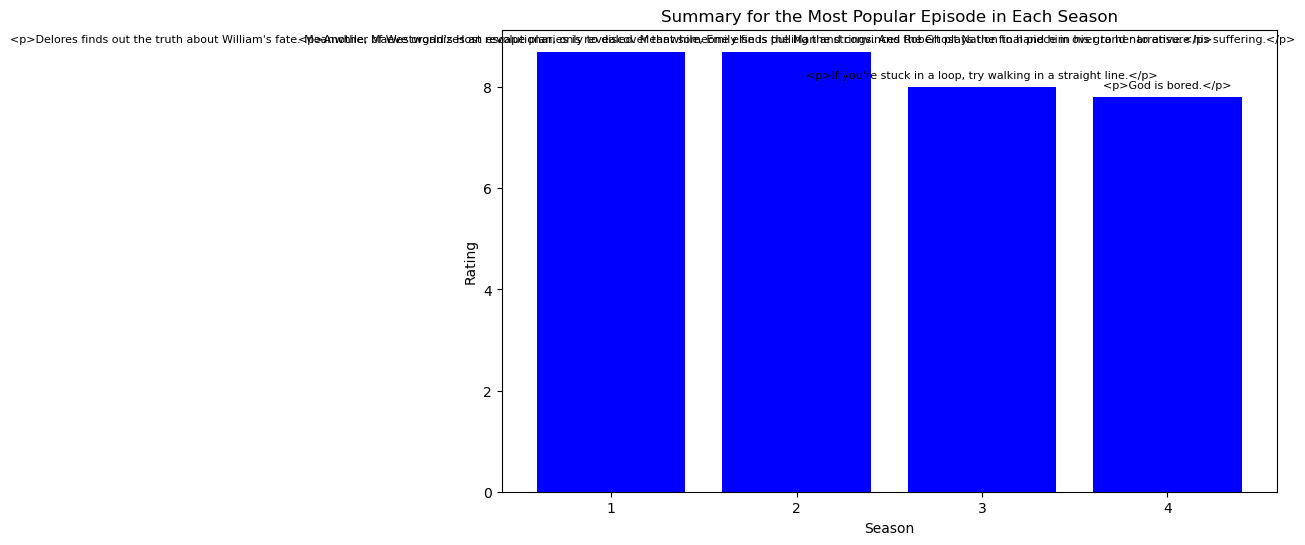

In [21]:
# Plot the episode summaries for the most popular episodes in each season
plt.figure(figsize=(10, 6))
plt.bar(seasons, episode_ratings, color='blue')
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Summary for the Most Popular Episode in Each Season')
plt.xticks(seasons)

# Annotate the episode summaries on the plot
for i, season in enumerate(seasons):
    plt.annotate(episode_summaries[i], (season, episode_ratings[i]), xytext=(0, 5),
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, wrap=True)

plt.show()
